In [5]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

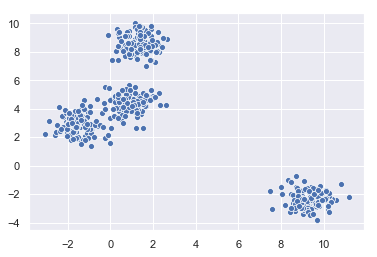

In [56]:
# Here the minPts=2*dims=2*4=8
x, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0, n_features=4)
sns.scatterplot(x[:,0],x[:,1]);

Text(0.5, 0, 'Points(sample) sorted by distance')

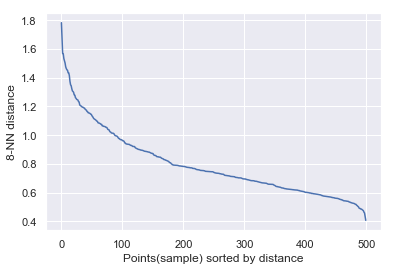

In [57]:
minPts = 4*2
# NearestNeighbors() calculate the distance from each point to its 7 closest neighbours
# The point_itself is included in n_neighbors
neigh = NearestNeighbors(n_neighbors=minPts)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)
# distances[:,minPts-1] gives the distances to the kth nearerst neighbour
distanceDec = sorted(distances[:,minPts-1], reverse=True)
plt.plot(distanceDec)
plt.ylabel('8-NN distance')
plt.xlabel('Points(sample) sorted by distance')

The optimal value for epsilon will be found at the point of maximum curvature.
Here we choose 1.2 for eps and setting min_samples i.e. minPts to 8

In [53]:
# train the model with eps=1.2, min_samples=8
db_model = DBSCAN(eps=1.2, min_samples=8)
db_model.fit(x)
labels = db_model.labels_

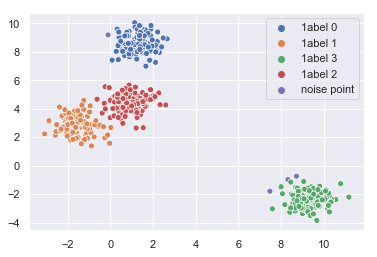

In [79]:
# Building the label to colour mapping 
colours = {} 
colours[0] = '1abel 0'
colours[1] = '1abel 1'
colours[2] = '1abel 2'
colours[3] = '1abel 3'
colours[-1] = 'noise point'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
sns.scatterplot(X[:,0], X[:,1], hue=cvec, legend='full')
plt.show()